In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

dataset_id = "PXD016057" # Indicate Dataset Here
# "MSV000086809", "PXD027742", "MSV000086004", "PXD016573", "PXD016057", "PXD017626", "PXD020586"

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx"

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]

sdrf_df["label"] = sdrf_df["label"].astype(str)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                                'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                                'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()

all_channels = ["126","127N","127C","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N","134C","135N"]

channels = []

info_dict = {}
for dataset in datasets:
    info_dict[dataset] = sdrf_df.loc[sdrf_df["File_Name"] == dataset]

first_info_df = info_dict[datasets[0]]
first_info_df.reset_index(drop=True, inplace=True)

for channel in all_channels:
    if first_info_df.index[first_info_df["label"] == channel].tolist():
        row = first_info_df.index[first_info_df["label"] == channel].tolist()[0]
        channel_type = first_info_df["type"].iloc[row]
        if (channel_type == "single"):
            channels.append(channel)

psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=channels)

data_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]
    

print(channels)

medians_df = pd.DataFrame(index=datasets, columns=channels)


for dataset in datasets:
    curr_df =  data_dict[dataset]
    for channel in channels:
        chan_df = curr_df.loc[curr_df["variable"] == channel]
        medians_df.at[dataset, channel] = chan_df['value'].median()
        
medians_df['Median'] = medians_df[channels].median(axis=1)

# psm_df
# sdrf_df
first_info_df
# medians_df

['126', '127N', '127C', '128N', '128C', '129N', '129C', '130C']


,file name,condition,Plex,sample_name,label,type,cell_equivalents,organism,cell-line,replicate,File_Name
0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,126,126,single,1.0,human,MOLM_14,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
1,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,127N,127N,single,1.0,human,K562,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
2,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,127C,127C,single,1.0,human,MOLM-14,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
3,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,128N,128N,single,1.0,human,K562,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
4,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,128C,128C,single,1.0,human,CMK,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
5,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,129N,129N,single,1.0,human,MOLM-14,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
6,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,129C,129C,single,1.0,human,CMK,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
7,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,130N,130N,blank,0.0,Blank,Blank,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
8,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,130C,130C,single,1.0,human,K562,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...
9,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...,1000x_0.1ng_131N_1e6_500ms,10.0,131N,131N,boost,1000.0,human,AML,1.0,3celltype_singlecell_Boost1000_8May19_Oak_Jup-...


In [2]:
variance_df = pd.DataFrame(index=datasets, columns=channels)

for dataset in datasets:
    for channel in channels:
        variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]

# sigmas = variance_df[channels].std()
sigma = np.nanstd(variance_df[channels])
mean = np.nanmean(variance_df[channels])
# print(sigmas)
print(sigma)
print(mean)

for dataset in datasets:
    for channel in channels:
        # curr_col = variance_df[channel]
        # variance_df = variance_df[(curr_col <= mean+(5*sigma))]
        
        if (variance_df.at[dataset, channel] > mean+(5*sigma)): 
            variance_df.at[dataset, channel] = np.nan
            
        
variance_df
variance_df.to_csv("variance.csv")

0.3355247635362667
1.0887027042584183


In [3]:
boost_volumes = set()

variance_df["Carrier Volume"] = ''

for dataset in datasets:
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    all_channels = info_df["label"]
    boost_volume = 0
    
    for channel in all_channels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
    
    boost_volumes.add(boost_volume)
    
    variance_df.at[dataset, "Carrier Volume"] = boost_volume
    
variance_df["Carrier Volume"] = pd.to_numeric(variance_df["Carrier Volume"], errors='coerce')
variance_df.sort_values(by=["Carrier Volume"], ascending=True)

variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(int)
# variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(str) + "x"


print(boost_volumes)

variance_df


{1000.0, 0.0, 100.0}


,126,127N,127C,128N,128C,129N,129C,130C,Carrier Volume
3celltype_singlecell_Boost1000_8May19_Oak_Jup-19-02-04,0.896369,0.785028,0.923467,0.88506,1.076533,1.80445,1.09061,2.335887,1000
3celltype_singlecell_Boost100_8May19_Oak_Jup-19-02-04,0.916678,0.811705,1.03619,0.758289,0.973618,1.026382,1.175342,1.144145,100
3celltype_singlecell_noBoost_8May19_Oak_Jup-19-02-04,1.118374,0.992248,1.007752,0.946392,1.053472,0.96418,0.968866,1.437829,0


In [4]:
counts_df = pd.DataFrame(index=["Above","Below", "Average", "St Dev"], columns=channels)

for channel in channels:
    column = variance_df[channel]
    counts_df.at["Above", channel] = column[column > 1.00].count()
    counts_df.at["Below", channel] = column[column < 1.00].count()
    counts_df.at["Average", channel] = column.mean()
    counts_df.at["St Dev", channel] = column.std()
    
counts_df

,126,127N,127C,128N,128C,129N,129C,130C
Above,1,0,2,0,2,2,2,3
Below,2,3,1,3,1,1,1,0
Average,0.97714,0.862994,0.989136,0.863247,1.034541,1.265004,1.078273,1.639287
St Dev,0.122732,0.11273,0.058622,0.09593,0.054006,0.468208,0.103789,0.620887


In [5]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
variance_df.reset_index(drop=True, inplace=True)

anova_df = pd.melt(variance_df.reset_index(), id_vars=['index'], value_vars=channels, ignore_index=False)

anova_df.columns = ['index', 'treatments', 'value']

res = stat()

anova_df



# res.anova_stat(df=anova_df, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary


# output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,index,treatments,value
0,0,126,0.896369
1,1,126,0.916678
2,2,126,1.118374
0,0,127N,0.785028
1,1,127N,0.811705
2,2,127N,0.992248
0,0,127C,0.923467
1,1,127C,1.03619
2,2,127C,1.007752
0,0,128N,0.88506


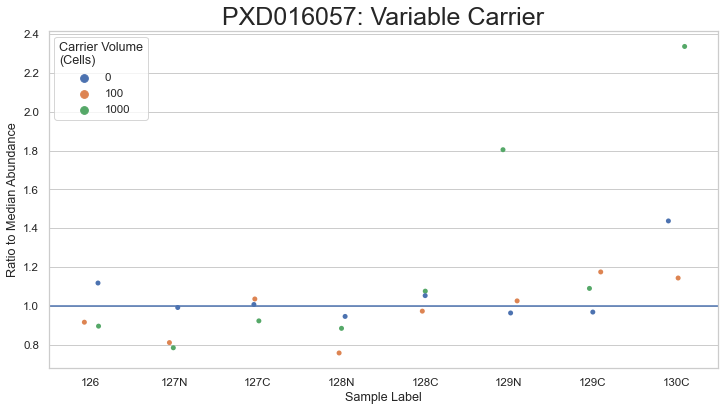

In [6]:
to_graph_df = pd.melt(variance_df, id_vars=["Carrier Volume"], value_vars=channels, ignore_index=False)
to_graph_df["Dataset"] = to_graph_df.index
to_graph_df

plt.figure(figsize=(12, 6.2025)) # Original: (16, 8.27)

sns.set(font_scale=1.05)
sns.set_style("whitegrid")

if (len(boost_volumes) == 1):
    title = dataset_id + ": " + str(round(next(iter(boost_volumes)))) + "x Carrier"
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, color='0', 
                     order=channels)
else:
    title = dataset_id + ": Variable Carrier"    
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Carrier Volume", 
                     order=channels)
    
    plt.legend(title="Carrier Volume\n(Cells)") # , alignment="center") # Need to Update matplotlib


boxplot.set_title(title, fontsize=25)

plt.axhline(y=1)

boxplot.set(xlabel="Sample Label", ylabel="Ratio to Median Abundance") # Change y label

plt.savefig(dataset_id + "/" + dataset_id + "_median_figure.png", dpi=400)
plt.show()